# Verifications: gensim

- Purpose: To measure similarity of documents, To summarize a document
- Keywords: gensim, bag-of-words, TF-IDF, Latent Semantic Indexing, Summarization

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 文書の類似度評価

In [2]:
from gensim import corpora, models, similarities

In [3]:
# コーパス
documents = ["Singapore tops talent competitiveness index in Asia Pacific for the 4th year running Globally",
             "Singapore is ranked second behind Switzerland, also for the fourth consecutive year",
             "Singapore on Tuesday (Apr 18) retained its top spot in Asia Pacific for the fourth consecutive year in the Global Talent Competitiveness Index",
             "Globally, Singapore is ranked second behind Switzerland, also for the fourth year running",
             "The report, which was announced during GTCI’s regional launch at the INSEAD Asia campus in Singapore, focused on talent and technology",
             "This year’s GTCI report shows that countries in the Asia Pacific region demonstrate strong talent readiness for technology",
             "Digital technologies will help small and exposed economies like Singapore punch above their weight by creating means for their businesses and talent to reach out to the global market"
                ]

In [4]:
# ストップワードを暫定的に以下の通り定義
stoplist = set('a able about across after all almost also am among an and any are as at be because been but by can cannot could dear did do does either else ever every for from get got had has have he her hers him his how however i if in into is it its just least let like likely may me might most must my neither no nor not of off often on only or other our own rather said say says she should since so some than that the their them then there these they this tis to too twas us wants was we were what when where which while who whom why will with would yet you your'.split())
print(stoplist)

{'her', 'for', 'say', 'had', 'where', 'him', 'across', 'but', 'be', 'should', 'must', 'do', 'his', 'in', 'only', 'them', 'by', 'like', 'he', 'am', 'just', 'often', 'are', 'as', 'because', 'an', 'how', 'also', 'these', 'when', 'why', 'twas', 'its', 'then', 'either', 'i', 'is', 'could', 'if', 'us', 'on', 'while', 'it', 'wants', 'you', 'said', 'does', 'can', 'however', 'have', 'whom', 'what', 'let', 'every', 'from', 'any', 'we', 'has', 'tis', 'hers', 'all', 'so', 'get', 'the', 'not', 'rather', 'at', 'ever', 'my', 'our', 'since', 'may', 'about', 'and', 'of', 'got', 'after', 'neither', 'other', 'been', 'yet', 'cannot', 'no', 'me', 'a', 'too', 'were', 'which', 'or', 'would', 'will', 'might', 'that', 'says', 'they', 'most', 'your', 'this', 'than', 'to', 'who', 'able', 'some', 'there', 'else', 'she', 'off', 'nor', 'was', 'almost', 'own', 'did', 'with', 'into', 'among', 'likely', 'their', 'least', 'dear'}


### 1) BOW形式

In [5]:
# コーパスのストップワード除去とトークン化でBagOfWords作成
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]
print(texts)

[['singapore', 'tops', 'talent', 'competitiveness', 'index', 'asia', 'pacific', '4th', 'year', 'running', 'globally'], ['singapore', 'ranked', 'second', 'behind', 'switzerland,', 'fourth', 'consecutive', 'year'], ['singapore', 'tuesday', '(apr', '18)', 'retained', 'top', 'spot', 'asia', 'pacific', 'fourth', 'consecutive', 'year', 'global', 'talent', 'competitiveness', 'index'], ['globally,', 'singapore', 'ranked', 'second', 'behind', 'switzerland,', 'fourth', 'year', 'running'], ['report,', 'announced', 'during', 'gtci’s', 'regional', 'launch', 'insead', 'asia', 'campus', 'singapore,', 'focused', 'talent', 'technology'], ['year’s', 'gtci', 'report', 'shows', 'countries', 'asia', 'pacific', 'region', 'demonstrate', 'strong', 'talent', 'readiness', 'technology'], ['digital', 'technologies', 'help', 'small', 'exposed', 'economies', 'singapore', 'punch', 'above', 'weight', 'creating', 'means', 'businesses', 'talent', 'reach', 'out', 'global', 'market']]


In [6]:
# 頻度辞書の作成
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
print(frequency)

defaultdict(<class 'int'>, {'singapore': 5, 'tops': 1, 'talent': 5, 'competitiveness': 2, 'index': 2, 'asia': 4, 'pacific': 3, '4th': 1, 'year': 4, 'running': 2, 'globally': 1, 'ranked': 2, 'second': 2, 'behind': 2, 'switzerland,': 2, 'fourth': 3, 'consecutive': 2, 'tuesday': 1, '(apr': 1, '18)': 1, 'retained': 1, 'top': 1, 'spot': 1, 'global': 2, 'globally,': 1, 'report,': 1, 'announced': 1, 'during': 1, 'gtci’s': 1, 'regional': 1, 'launch': 1, 'insead': 1, 'campus': 1, 'singapore,': 1, 'focused': 1, 'technology': 2, 'year’s': 1, 'gtci': 1, 'report': 1, 'shows': 1, 'countries': 1, 'region': 1, 'demonstrate': 1, 'strong': 1, 'readiness': 1, 'digital': 1, 'technologies': 1, 'help': 1, 'small': 1, 'exposed': 1, 'economies': 1, 'punch': 1, 'above': 1, 'weight': 1, 'creating': 1, 'means': 1, 'businesses': 1, 'reach': 1, 'out': 1, 'market': 1})


In [7]:
# 頻度が２以上のワード群を表示
texts = [[token for token in text if frequency[token] > 1]
         for text in texts]
texts

[['singapore',
  'talent',
  'competitiveness',
  'index',
  'asia',
  'pacific',
  'year',
  'running'],
 ['singapore',
  'ranked',
  'second',
  'behind',
  'switzerland,',
  'fourth',
  'consecutive',
  'year'],
 ['singapore',
  'asia',
  'pacific',
  'fourth',
  'consecutive',
  'year',
  'global',
  'talent',
  'competitiveness',
  'index'],
 ['singapore',
  'ranked',
  'second',
  'behind',
  'switzerland,',
  'fourth',
  'year',
  'running'],
 ['asia', 'talent', 'technology'],
 ['asia', 'pacific', 'talent', 'technology'],
 ['singapore', 'talent', 'global']]

In [8]:
#辞書の保存（頻度が２以上の単語をIDと共に保存）
dictionary = corpora.Dictionary(texts)
dictionary.save('gensim_experiments.dict')

In [9]:
print(dictionary)

Dictionary(16 unique tokens: ['asia', 'competitiveness', 'index', 'pacific', 'running']...)


In [10]:
print(dictionary.token2id)

{'asia': 0, 'competitiveness': 1, 'index': 2, 'pacific': 3, 'running': 4, 'singapore': 5, 'talent': 6, 'year': 7, 'behind': 8, 'consecutive': 9, 'fourth': 10, 'ranked': 11, 'second': 12, 'switzerland,': 13, 'global': 14, 'technology': 15}


In [11]:
# サンプル文書を基に、BOWをベクトル表示
doc_example = "Singapore is very competitive in Asia"
vec_bow_example = dictionary.doc2bow(doc_example.lower().split())#doc2bow()はdistinctした結果から単語の出現回数をカウントしIDと共に表示
print(vec_bow_example) # the word "competitive" は辞書に存在しないため無視される。is,very,inはstopwordsのため無視される

[(0, 1), (5, 1)]


In [12]:
# コーパスの文書全てに対し、BOWベクトルを求め表示
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(5, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (5, 1), (6, 1), (7, 1), (9, 1), (10, 1), (14, 1)], [(4, 1), (5, 1), (7, 1), (8, 1), (10, 1), (11, 1), (12, 1), (13, 1)], [(0, 1), (6, 1), (15, 1)], [(0, 1), (3, 1), (6, 1), (15, 1)], [(5, 1), (6, 1), (14, 1)]]


In [13]:
#ベクトル化したコーパス文書の保存
corpora.MmCorpus.serialize('gensim_experiments.mm', corpus) # store to disk, for later use

In [14]:
#ベクトル化したコーパス文書の読み込み
corpus = corpora.MmCorpus('gensim_experiments.mm')
print(corpus)

MmCorpus(7 documents, 16 features, 44 non-zero entries)


In [15]:
# 要素毎に再表示
for doc in corpus:
    print(doc)

[(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (7, 1.0)]
[(5, 1.0), (7, 1.0), (8, 1.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 1.0), (13, 1.0)]
[(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (5, 1.0), (6, 1.0), (7, 1.0), (9, 1.0), (10, 1.0), (14, 1.0)]
[(4, 1.0), (5, 1.0), (7, 1.0), (8, 1.0), (10, 1.0), (11, 1.0), (12, 1.0), (13, 1.0)]
[(0, 1.0), (6, 1.0), (15, 1.0)]
[(0, 1.0), (3, 1.0), (6, 1.0), (15, 1.0)]
[(5, 1.0), (6, 1.0), (14, 1.0)]


### 2) TF-IDF形式

In [16]:
# 辞書とコーパス（BOW型）の読み込み
import os
from gensim import corpora, models, similarities
if (os.path.exists("gensim_experiments.dict")):
    dictionary = corpora.Dictionary.load('gensim_experiments.dict')
    corpus = corpora.MmCorpus('gensim_experiments.mm')
    print("Loaded dictionary and corpus")
else:
    print("Please generate data set")

Loaded dictionary and corpus


In [17]:
#コーパスを bag-of-words 型からTF-IDF型（Term Frequency and Inverse Document Frequency）へ変換するモデルを生成
tfidf = models.TfidfModel(corpus)
doc_bow_example = [(0, 1), (1, 1)]
print(tfidf[doc_bow_example])

[(0, 0.40786146474142787), (1, 0.9130438245664756)]


In [18]:
#全コーパスをTF-IDF形式に変換・表示
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.22333011474013234), (1, 0.4999496145890451), (2, 0.4999496145890451), (3, 0.33813758020918966), (4, 0.4999496145890451), (5, 0.13427852614507685), (6, 0.13427852614507685), (7, 0.22333011474013234)]
[(5, 0.11221120957845192), (7, 0.1866280709933418), (8, 0.41778795606310304), (9, 0.41778795606310304), (10, 0.2825680916262805), (11, 0.41778795606310304), (12, 0.41778795606310304), (13, 0.41778795606310304)]
[(0, 0.19120290039161436), (1, 0.42802922691517054), (2, 0.42802922691517054), (3, 0.2894947067153461), (5, 0.11496185227471352), (6, 0.11496185227471352), (7, 0.19120290039161436), (9, 0.42802922691517054), (10, 0.2894947067153461), (14, 0.42802922691517054)]
[(4, 0.41778795606310304), (5, 0.11221120957845192), (7, 0.1866280709933418), (8, 0.41778795606310304), (10, 0.2825680916262805), (11, 0.41778795606310304), (12, 0.41778795606310304), (13, 0.41778795606310304)]
[(0, 0.3961244212688575), (6, 0.23817210464404653), (15, 0.8867691308586684)]
[(0, 0.3397097968012109), (3, 0.5

### 3) 潜在意味解析 (LSI) 形式

潜在的意味解析（LSA：latent semantic analysis）は、情報検索の分野において、言葉の同義牲や多義性に対処するために発展した統計的技法である。すべての文書の背後には意味の構造が存在すると考え、これを行列の形に表現し、分解するところにLSAの特徴がある。行列として表現された語句と文書は、多変量解析の考えを適用し、数学的、統計的に分析対象とすることができる。LSAでは、さまざまな言葉で表現される意味の豊かすぎる部分を、行列の分解という形で取り除き、複数の語句の背後に共通して潜在する意味構造を抽出する。そのままの豊かさよりも、凝縮した構造のほうが、語句に留まらない意味の豊かさを効率的に表現できる可能性がある。 語句と文書を共起行列という形で表現し、潜在的な意味の構造を特異値分析で抽出するのがLSAである.
http://www.gifu-nct.ac.jp/elec/deguchi/sotsuron/osaki/node14.html

In [19]:
#全コーパスをLSI　（Latent Semantic Indexing）形式に変換(2次元=トピック数)
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)
corpus_lsi = lsi[corpus_tfidf]
print(corpus_lsi)

In [20]:
# LSI形式に変換したコーパスの表示
for doc in corpus_lsi:
    print(doc)

[(0, 0.6720573142811622), (1, 0.010830018112295434)]
[(0, 0.5326169626752311), (1, -0.6819120577356104)]
[(0, 0.7559738905430721), (1, -0.06763399458337703)]
[(0, 0.5349921559842177), (1, -0.6733147959206227)]
[(0, 0.5172197653188824), (1, 0.680916991519212)]
[(0, 0.609178991307313), (1, 0.6765398096430153)]
[(0, 0.3560677538145509), (1, 0.008283926460691204)]


## 4) Numpy Array形式（プロット用）

In [21]:
# LSI形式では、トピックモデルをベースとしているため、トピックの表示が可能
lsi.print_topics(2)

[(0,
  '0.391*"technology" + 0.322*"pacific" + 0.300*"asia" + 0.280*"competitiveness" + 0.280*"index" + 0.278*"global" + 0.237*"running" + 0.232*"consecutive" + 0.221*"fourth" + 0.218*"talent"'),
 (1,
  '0.606*"technology" + -0.307*"behind" + -0.307*"switzerland," + -0.307*"second" + -0.307*"ranked" + 0.265*"asia" + -0.218*"fourth" + 0.180*"pacific" + -0.170*"consecutive" + 0.161*"talent"')]

In [22]:
#　Numpyアレイ形式へ変換
import numpy as np
vec = np.array([(doc[0][1],doc[1][1]) for doc in corpus_lsi])
print(vec.shape)
print(vec)

(7, 2)
[[ 0.67205731  0.01083002]
 [ 0.53261696 -0.68191206]
 [ 0.75597389 -0.06763399]
 [ 0.53499216 -0.6733148 ]
 [ 0.51721977  0.68091699]
 [ 0.60917899  0.67653981]
 [ 0.35606775  0.00828393]]


In [23]:
%matplotlib inline
from matplotlib import pylab as plt

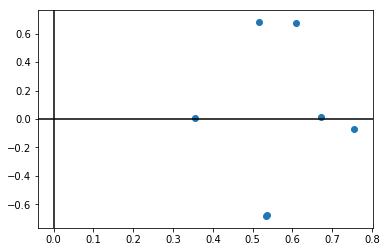

In [24]:
# Numpyアレイ形式へ変換したLSIコーパス（２次元ベクトル）をプロット
fig = plt.figure()
fig.add_subplot(1,1,1)
plt.axvline(x=0, color = "#000000")
plt.axhline(y=0, color = "#000000")
plt.scatter(vec[:, 0], vec[:, 1])
vec[:,0]
vec[:,1]
plt.show()

In [25]:
# 代表文のLSI形式ベクトル化　（これとコーパス中の全文が類似度評価される）
doc_example = "Singapore is very competitive in Asia"
vec_bow_example = dictionary.doc2bow(doc_example.lower().split())#doc2bow()はdistinctした結果から単語の出現回数をカウントしIDと共に表示
print(vec_bow_example) # the word "competitive" は辞書に存在しないため無視される
vec_lsi_example = lsi[vec_bow_example] # convert the query to LSI space
print(vec_lsi_example)

[(0, 1), (5, 1)]
[(0, 0.4633599284629336), (1, 0.18039268445099882)]


In [26]:
# 全コーパスをLSI形式コーパスに変換し、かつインデックス化
index = similarities.MatrixSimilarity(lsi[corpus]) # transform corpus to LSI space and index it
print(index)

MatrixSimilarity<7 docs, 2 features>


In [27]:
#代表文とコーパス内各文に対する類似度を測定
sims = index[vec_lsi_example] # LSIコーパスに対する類似度をインデックス化
print ("Similarities of index corpus documents to '%s:'" % doc_example)
list(enumerate(sims)) # print (document_number, document_similarity) 2-tuples

Similarities of index corpus documents to 'Singapore is very competitive in Asia:'


[(0, 0.9636234),
 (1, 0.3314538),
 (2, 0.92485464),
 (3, 0.3383578),
 (4, 0.8880485),
 (5, 0.91847587),
 (6, 0.9626515)]

In [28]:
#類似度別にソートして再表示
sims = sorted(enumerate(sims), key=lambda item: -item[1])
sims

[(0, 0.9636234),
 (6, 0.9626515),
 (2, 0.92485464),
 (5, 0.91847587),
 (4, 0.8880485),
 (3, 0.3383578),
 (1, 0.3314538)]

In [29]:
# ベストスコアの表示
best_score = max(sims)
best_score

(6, 0.9626515)

In [30]:
# ベストスコアを出した文（最も類似した文）の表示
index = sims.index(best_score)
most_similar_doc = documents[index]
print ("The document most similar to the document is '%s' with a score of %.2f." % (most_similar_doc, best_score[1]))

The document most similar to the document is 'Singapore is ranked second behind Switzerland, also for the fourth consecutive year' with a score of 0.96.


## 文書要約

In [31]:
from gensim.summarization import summarize

In [32]:
text = "Thomas A. Anderson is a man living two lives. By day he is an " + \
    "average computer programmer and by night a hacker known as " + \
    "Neo. Neo has always questioned his reality, but the truth is " + \
    "far beyond his imagination. Neo finds himself targeted by the " + \
    "police when he is contacted by Morpheus, a legendary computer " + \
    "hacker branded a terrorist by the government. Morpheus awakens " + \
    "Neo to the real world, a ravaged wasteland where most of " + \
    "humanity have been captured by a race of machines that live " + \
    "off of the humans' body heat and electrochemical energy and " + \
    "who imprison their minds within an artificial reality known as " + \
    "the Matrix. As a rebel against the machines, Neo must return to " + \
    "the Matrix and confront the agents: super-powerful computer " + \
    "programs devoted to snuffing out Neo and the entire human " + \
    "rebellion. "

In [33]:
print ('Input text:')
print (text)

Input text:
Thomas A. Anderson is a man living two lives. By day he is an average computer programmer and by night a hacker known as Neo. Neo has always questioned his reality, but the truth is far beyond his imagination. Neo finds himself targeted by the police when he is contacted by Morpheus, a legendary computer hacker branded a terrorist by the government. Morpheus awakens Neo to the real world, a ravaged wasteland where most of humanity have been captured by a race of machines that live off of the humans' body heat and electrochemical energy and who imprison their minds within an artificial reality known as the Matrix. As a rebel against the machines, Neo must return to the Matrix and confront the agents: super-powerful computer programs devoted to snuffing out Neo and the entire human rebellion. 


In [34]:
print ('Summary:')
print (summarize(text))

Summary:
Morpheus awakens Neo to the real world, a ravaged wasteland where most of humanity have been captured by a race of machines that live off of the humans' body heat and electrochemical energy and who imprison their minds within an artificial reality known as the Matrix.


In [35]:
print ('Summary_splitted:')
print (summarize(text, split=True))

Summary_splitted:
["Morpheus awakens Neo to the real world, a ravaged wasteland where most of humanity have been captured by a race of machines that live off of the humans' body heat and electrochemical energy and who imprison their minds within an artificial reality known as the Matrix."]


Reference: https://radimrehurek.com/gensim/